KNN CLASSIFICATION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
file_path = "D:\\Documents\\MCA 4TH SEM\\MCA-206 DA\\FULL SEMESTER PROJECT\\Airbnb_data_clean.csv"
df = pd.read_csv(file_path, encoding='latin1')
df['target'] = (df['log_price'] > 4.5).astype(int)

C:\Users\bsumi\AppData\Local\Temp\ipykernel_13860\10110979.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


In [4]:
X = df[['accommodates', 'bedrooms', 'beds']]
y = df['target']

In [5]:
np.random.seed(42)  
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
X_train, X_test = X.iloc[indices[:train_size]], X.iloc[indices[train_size:]]
y_train, y_test = y.iloc[indices[:train_size]], y.iloc[indices[train_size:]]

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
k_values = range(1, 40)
accuracies = []

In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

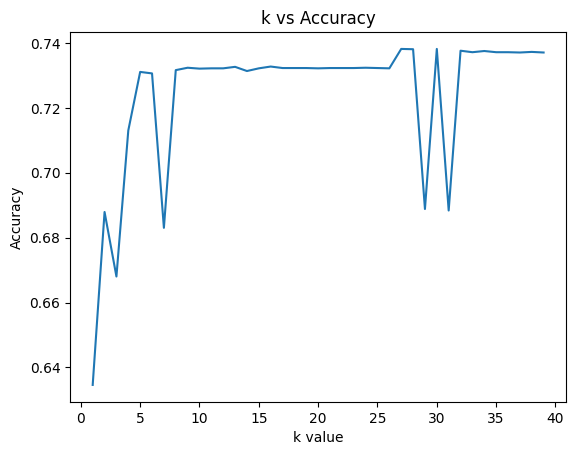

In [9]:
plt.plot(k_values, accuracies)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()

In [10]:

y_pred = knn.predict(X_test)

In [11]:
correct_predictions = sum(y_test == y_pred)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions
accuracy

0.7370649972380777

In [12]:
true_positives = sum((y_test == 1) & (y_pred == 1))
false_positives = sum((y_test == 0) & (y_pred == 1))
precision = true_positives / (true_positives + false_positives)
precision

0.8420404573438874

In [13]:
false_negatives = sum((y_test == 1) & (y_pred == 0))
recall = true_positives / (true_positives + false_negatives)
recall

0.7097108969607117

In [16]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score


0.7702333065164925